In [1]:
# Imports

# Math
import math
import numpy as np
import matplotlib.pyplot as plt

# Dataset
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler


In [2]:
# Generate Dataset

# Load Data
def load_data():
  dataset = load_diabetes()

  X = dataset.data
  y = dataset.target.reshape(-1, 1)

  # It is good practice to standardize prior to PCA, but this is causing big
  # issues for me so I'm leaving it out
  # scaler = StandardScaler()
  # X = scaler.fit_transform(X)

  X = feature_reduction(X)

  # Concatenate
  data = np.hstack((X, y))

  return data

In [3]:
# Reduce Features to 1 per assignment
def feature_reduction(X):
  pca = PCA(n_components = 1)
  return pca.fit_transform(X)

In [4]:
# Shuffle and Create Split Training/Dev/Test 70/15/15%
def shuffle_and_split(data):
  np.random.shuffle(data)

  total_sample = len(data)
  train = data[:int(total_sample*0.7)]
  dev = data[int(total_sample*0.7):int(total_sample*0.85)]
  test = data[int(total_sample*0.85):]
  return total_sample, train, dev, test

In [5]:
# Run Cell to Visualize Data and Shuffle (random set)
data_2 = load_data()

# Data Types
def visualize_data():
  print(f"X is of type {type(data_2[0])}")
  print(data_2[0][:10])
  print()
  print(f"y is of type {type(data_2[1])}")
  print(data_2[1][:10])
  print()
  print("Shape:")
  print(data_2.shape)
  print()

# Shuffle
def visualize_shuffle():
  temp = data_2[10:15]
  print("Initial Data:")
  print(temp)
  print()
  print("Shuffled:")
  np.random.shuffle(temp)
  print(temp)

visualize_data()
visualize_shuffle()


X is of type <class 'numpy.ndarray'>
[2.79302143e-02 1.51000000e+02]

y is of type <class 'numpy.ndarray'>
[-0.13468668 75.        ]

Shape:
(442, 2)

Initial Data:
[[-1.83420944e-01  1.01000000e+02]
 [ 1.88791436e-02  6.90000000e+01]
 [-7.59310434e-02  1.79000000e+02]
 [ 1.51476346e-02  1.85000000e+02]
 [-8.01680343e-02  1.18000000e+02]]

Shuffled:
[[ 1.51476346e-02  1.85000000e+02]
 [-8.01680343e-02  1.18000000e+02]
 [-1.83420944e-01  1.01000000e+02]
 [ 1.88791436e-02  6.90000000e+01]
 [-7.59310434e-02  1.79000000e+02]]


In [6]:
# Get Features and Labels
def get_features_and_labels(data):
  features = data[:, :-1]
  labels = data[:, -1]
  return features, labels

In [7]:
# Linear Regression Model
def univariate_linear_regression(theta, input):
  prediction = theta[0] + theta[1] * input
  return prediction

In [8]:
# Cost Function
def compute_cost(Y_pred, Y_true, length):
  m = length
  J = 1/(2*m) * np.sum((Y_pred - Y_true)**2) # Mean Squared Error
  # J = (1/2*m) * (np.abs(Y_pred - Y_true)) # Mean Absolute Error

  # print(f"J: {J}")
  return J

In [9]:
# Gradient Descent
def update_theta(theta, X, Y_true, Y_pred, learning_rate, length):
  m = length
  theta[0] = theta[0] - (learning_rate * (1/m) * np.sum(Y_pred - Y_true))
  theta[1] = theta[1] - (learning_rate * (1/m) * np.sum((Y_pred - Y_true) * X))
  return theta

In [10]:
# Plot Results
def plot_results(k, length, theta, X, Y, cost):
  plt.subplot(5, 5, k)
  plt.scatter(X, Y, color='b')

  # Make predictions on X values
  temp_input = np.array([x_val for x_val in X])
  temp_prediction = univariate_linear_regression(theta, temp_input)
  plt.plot(temp_input, temp_prediction, 'g')

  s = 'theta:[%.4f, %.4f]' %(theta[0], theta[1])
  c = 'cost:%.4f' %cost
  plt.title(s+'\n'+c)



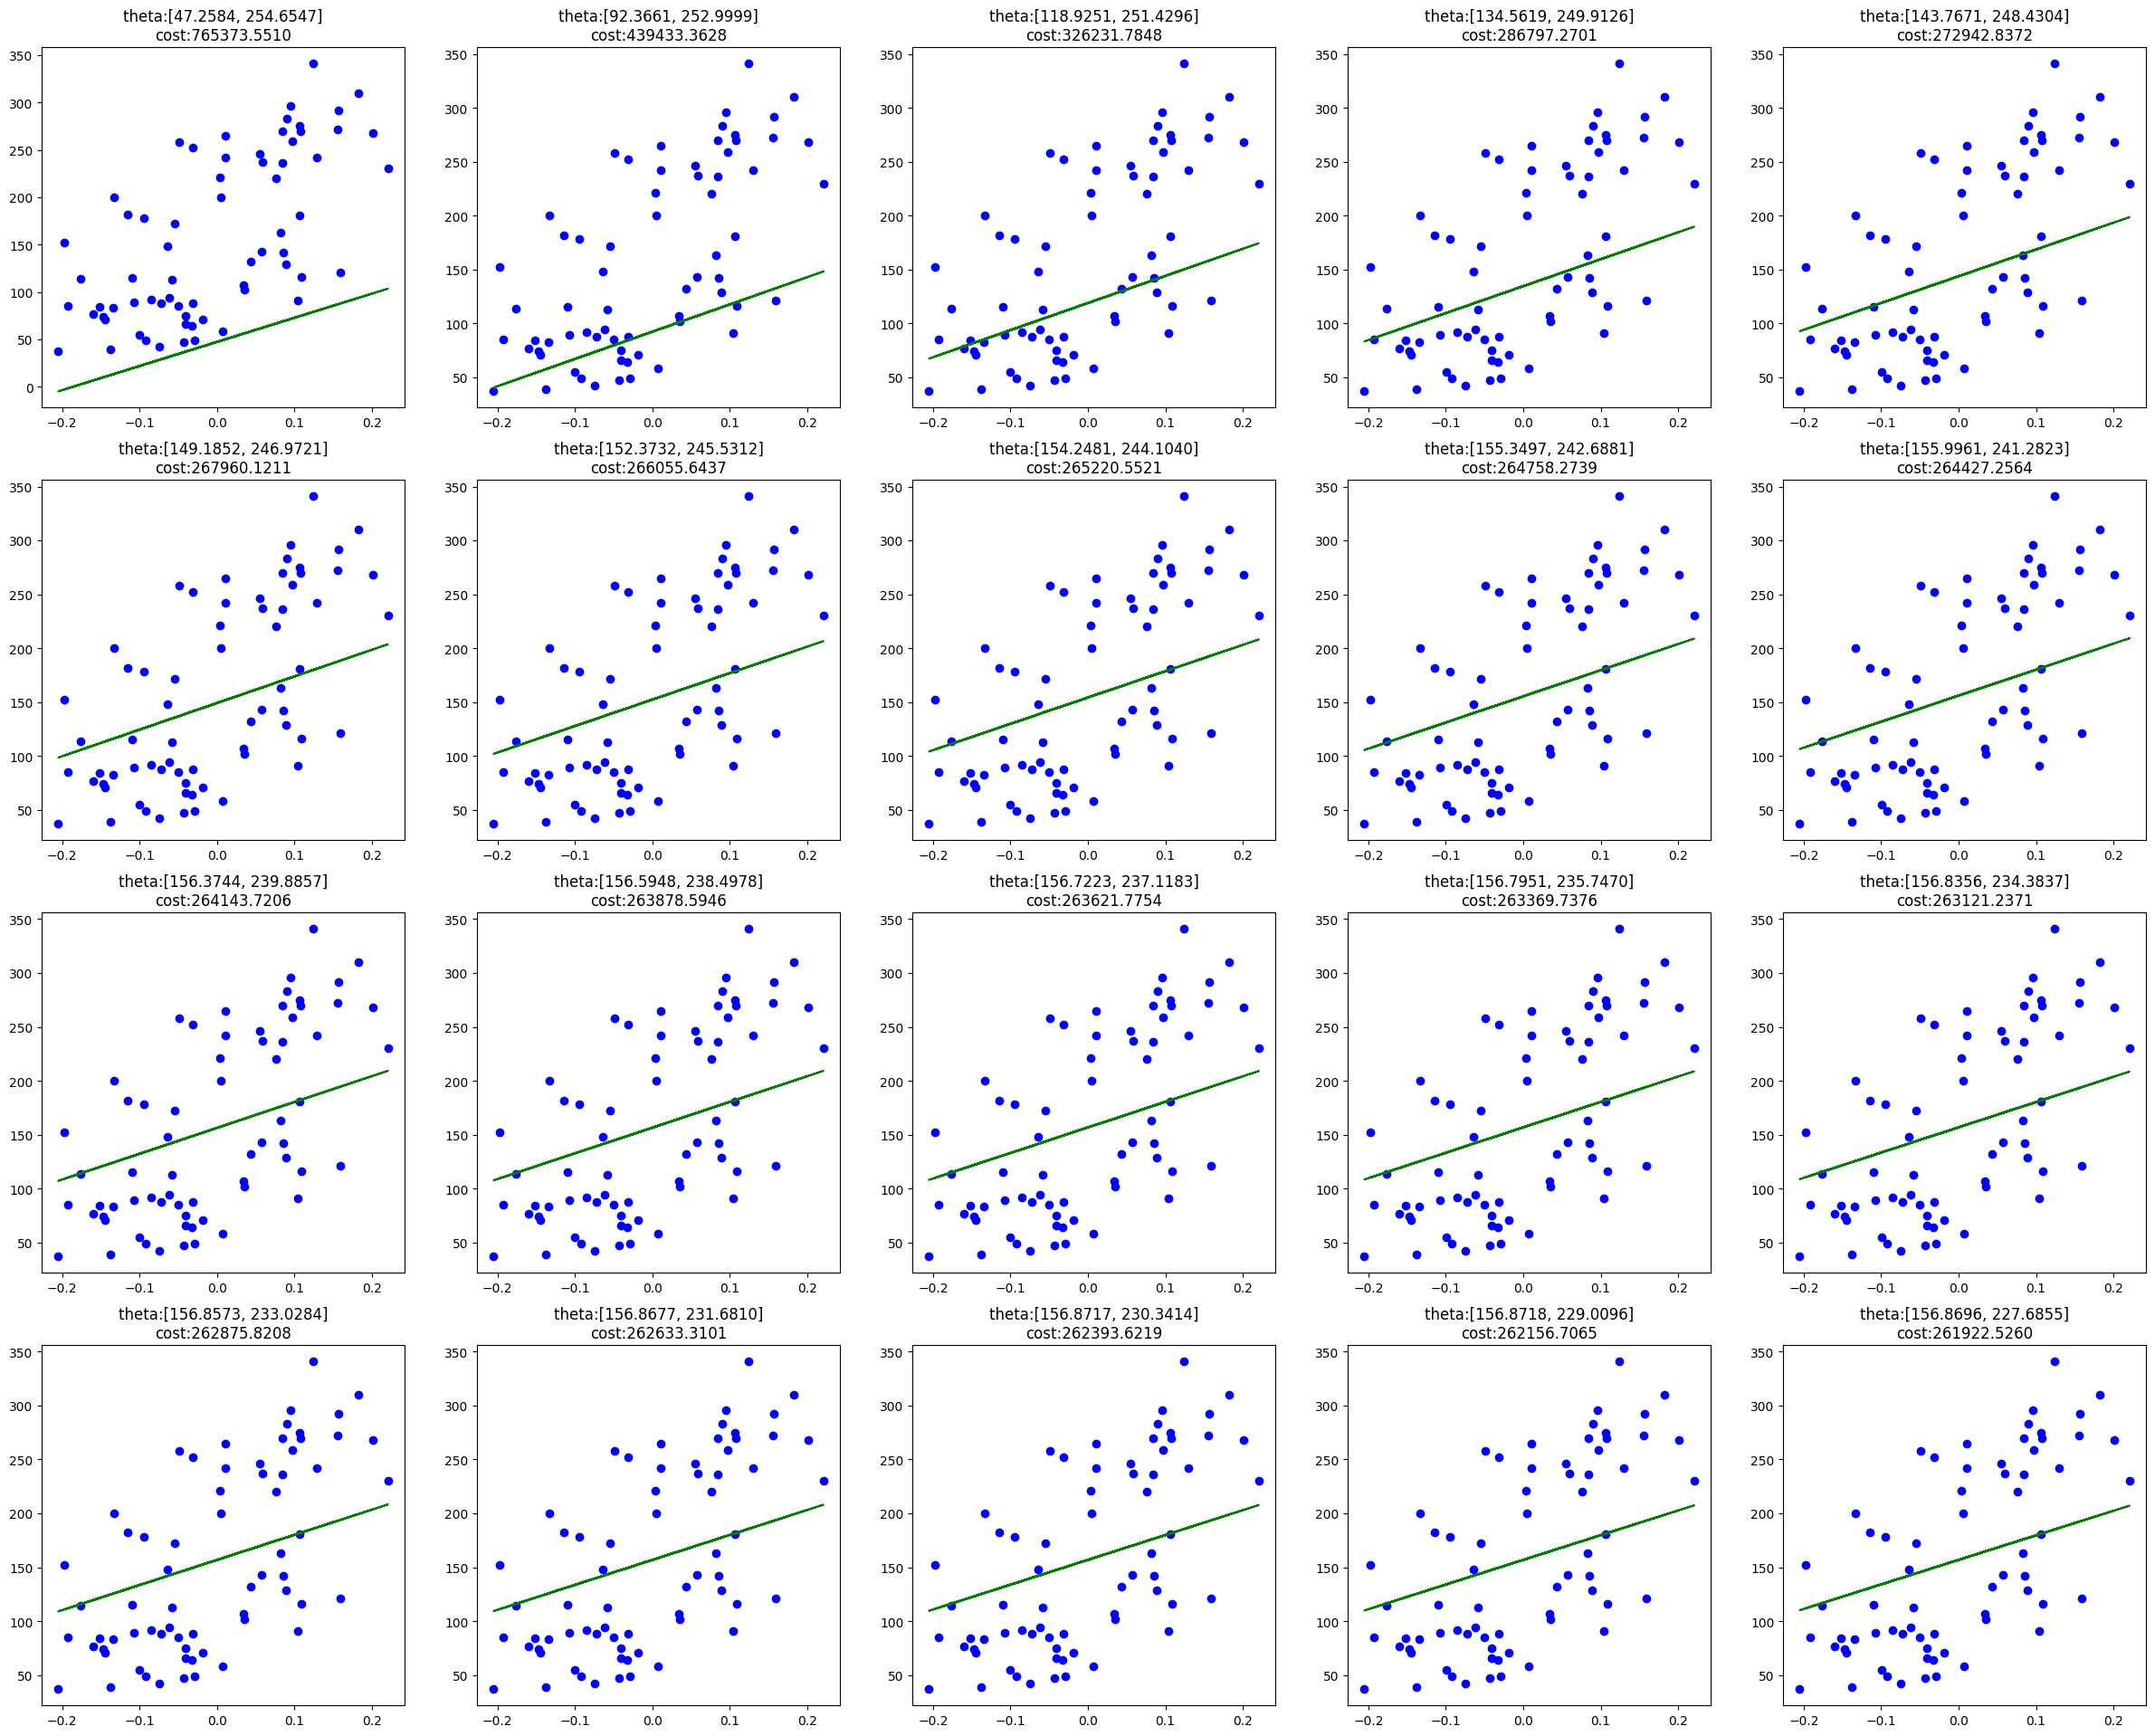

In [11]:
# Run the Program

def get_regression_analysis(theta, data, learning_rate):
  # Shuffle and Split
  total_sample, train, dev, test = shuffle_and_split(data)

  train_x, train_y = get_features_and_labels(train)
  dev_x, dev_y = get_features_and_labels(dev)
  test_x, test_y = get_features_and_labels(test)


  plt.figure(figsize=(30, 30))
  k = 0
  length = len(test_y)
  for i in range(100):
    prediction = univariate_linear_regression(theta, test_x)
    cost = compute_cost(prediction, test_y, length)
    theta = update_theta(theta, test_x, test_y, prediction, learning_rate, length)
    if i%5 == 0:
      k += 1
      plot_results(k, length, theta, test_x, test_y, cost)

# Hyperparameters
theta = [35.0, 255.0]
learning_rate = 0.0015

data = load_data()
get_regression_analysis(theta, data, learning_rate)